# Starting a Exploratory Data Analysis


In [39]:
from taxipred.backend.data_processing import load_csv

df = load_csv("taxi_trip_pricing.csv")


 some first exploration

In [40]:
df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [41]:
df.shape


(1000, 11)

In [42]:
df.sample(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
898,1.64,Afternoon,Weekday,3.0,Low,Clear,3.32,1.53,0.44,61.16,32.7396
843,48.09,Afternoon,Weekend,1.0,High,Clear,4.47,1.23,0.29,92.60,90.4747
155,12.86,Evening,Weekday,1.0,Low,Clear,2.39,1.13,0.40,56.62,39.5698
870,19.29,Evening,Weekend,3.0,Low,Clear,3.99,1.51,0.16,94.79,48.2843
444,40.83,Evening,Weekday,1.0,Low,Rain,4.90,1.35,NaN,39.90,69.9955


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


The targhet variable/ label will be Trip_Price 
- there are 49 null valor in trip price 
- passenger count is a float but it coud easy be an integer 
- base fare also have missing valor


In [44]:
df["Trip_Price"].describe()

count    951.000000
mean      56.874773
std       40.469791
min        6.126900
25%       33.742650
50%       50.074500
75%       69.099350
max      332.043689
Name: Trip_Price, dtype: float64

In [45]:
df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [46]:
df["Trip_Distance_km"].describe()

count    950.000000
mean      27.070547
std       19.905300
min        1.230000
25%       12.632500
50%       25.830000
75%       38.405000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [47]:
df["Trip_Duration_Minutes"].describe()

count    950.000000
mean      62.118116
std       32.154406
min        5.010000
25%       35.882500
50%       61.860000
75%       89.055000
max      119.840000
Name: Trip_Duration_Minutes, dtype: float64

<Axes: xlabel='Day_of_Week', ylabel='Trip_Price'>

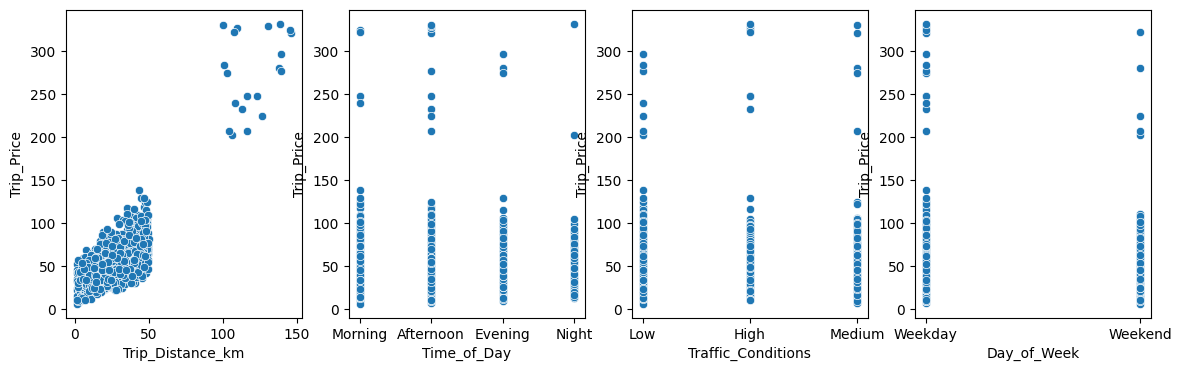

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4, figsize=(14,4))
sns.scatterplot(data= df, x= "Trip_Distance_km", y= "Trip_Price", ax = axes[0])
sns.scatterplot(data= df, x= "Time_of_Day", y= "Trip_Price", ax = axes[1])
sns.scatterplot(data= df, x= "Traffic_Conditions", y= "Trip_Price", ax = axes[2])
sns.scatterplot(data= df, x= "Day_of_Week", y= "Trip_Price", ax = axes[3])



It is clear that beyond 50 km the data show increased dispersion.

In [49]:
df["Weather"].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

In [50]:
df["Day_of_Week"].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [51]:
df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

I whant understand wich feature influence more my targhet 

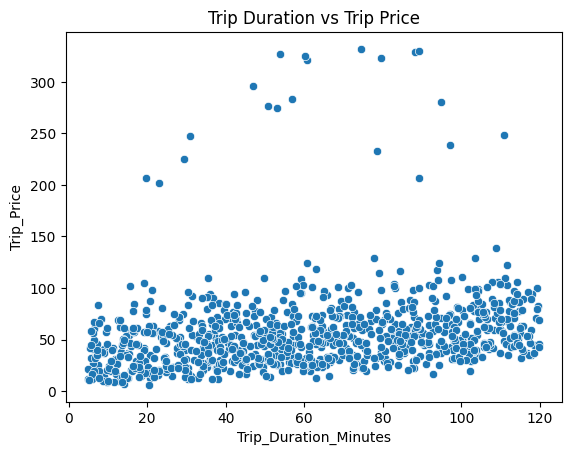

In [52]:
sns.scatterplot(
    data=df,
    x="Trip_Duration_Minutes",
    y="Trip_Price",
   
)
plt.title("Trip Duration vs Trip Price")
plt.show()


Trip duration appears to be strongly related to trip price, suggesting it will be a key feature for the model.

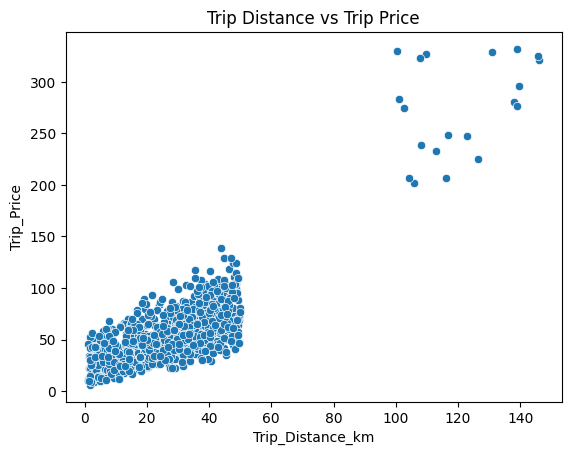

In [53]:
sns.scatterplot(
    data=df,
    x="Trip_Distance_km",
    y="Trip_Price",
   
)
plt.title("Trip Distance vs Trip Price")
plt.show()


There is a strong relation between Trip Duration vs Trip price and Trip Destance and Trip price.


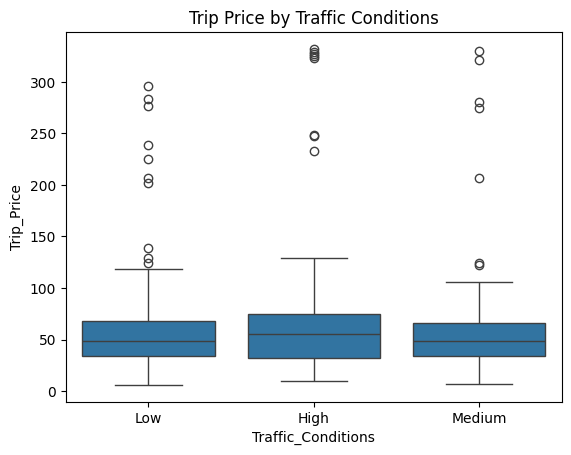

In [54]:
sns.boxplot(
    data=df,
    x="Traffic_Conditions",
    y="Trip_Price"
)
plt.title("Trip Price by Traffic Conditions")
plt.show()


## EDA Summary and Decisions

- The target variable is `Trip_Price`
- Rows with missing target values will be removed
- Numerical features such as trip distance and trip duration show a clear relationship with price

## Model Selection Regression

This is a regression problem, as the target variable represents a continuous cost value returned by the application.
Therefore, classification models are not suitable for this task.

The models that will be tested are:
- Linear Regression
- KNN Regression
- Random Forest Regression

